# Tutorial presentation on using EU-ESES Modelling Tool - Sessions No.2

## Agenda:
- Respond to possible installation querries
- Build model on local computer
- Discussion 

## Model Formulation
![title](img/modelformulation.png) 

## Build own Model using existing Dataset

In [1]:
import euses 

In [2]:
eu_ds = euses.Dataset.import_dataset('eu.nc')
eu_ds.countries

['Denmark',
 'Germany',
 'Poland',
 'Estonia',
 'Latvia',
 'Lithuania',
 'Finland',
 'Sweden',
 'Norway',
 'Netherlands',
 'Great Britain',
 'Ireland',
 'Belgium',
 'Spain',
 'France',
 'Portugal',
 'Switzerland',
 'Italy',
 'Luxembourg',
 'Czech Rep.',
 'Slovakia',
 'Slovenia',
 'Greece',
 'Hungary',
 'Bulgaria',
 'Romania',
 'Croatia',
 'Austria']

### Filter country

In [3]:
filt_ds = eu_ds.filter_countries(['Germany','France'])

### See map of selected countries

<AxesSubplot:>

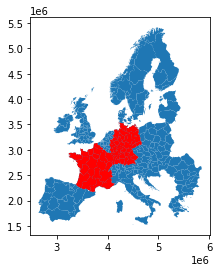

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt
gpd_geo_all_countries = gpd.GeoDataFrame(eu_ds.ds['geometry'].values, columns=['geometry'], index = eu_ds.ds.coords['nuts_2'])
gpd_geo_filtered_countries = gpd.GeoDataFrame(filt_ds.ds['geometry'].values, columns=['geometry'], index = filt_ds.ds.coords['nuts_2'])

fig, ax = plt.subplots()
gpd_geo_all_countries.plot(ax=ax)
gpd_geo_filtered_countries.plot(ax=ax, color='r')

 ### List variables in dataset

In [5]:
filt_ds.ds

<xarray.Dataset>
Dimensions:             (hydro_storage_tech: 2, hydro_tech: 3, nuts_0: 2, nuts_2: 59, tech: 13, time: 8760)
Coordinates:
  * nuts_2              (nuts_2) object 'FR30' 'FR41' 'FR42' ... 'DEA5' 'DEB1'
  * time                (time) datetime64[ns] 2010-01-01 ... 2010-12-31T23:00:00
  * nuts_0              (nuts_0) object 'DE' 'FR'
  * hydro_tech          (hydro_tech) object 'HDAM' 'HPHS' 'HROR'
  * hydro_storage_tech  (hydro_storage_tech) object 'HDAM' 'HPHS'
  * tech                (tech) object 'Coal' 'Cogeneration' ... 'Gas' 'Other'
Data variables:
    country_code        (nuts_2) object 'FR' 'FR' 'FR' 'FR' ... 'DE' 'DE' 'DE'
    geometry            (nuts_2) object POLYGON ((3802065 3115283, 3802906 3104014, 3808357 3103718, 3812850 3093215, 3817785 3090854, 3820928 3088911, 3829392 3097021, 3835047 3097096, 3838815 3097987, 3840322 3094044, 3844678 3088814, 3845570 3086319, 3843876 3080814, 3845576 3076597, 3845700 3067991, 3851739 3063349, 3860725 3066890, 3862113 3066078, 3860314 3062365, 3868536 3061788, 3871120 3058361, 3871888 3052474, 3870382 3047969, 3873502 3040442, 3876573 3045512, 3886183 3042034, 3896519 3044671, 3909385 3032194, 3901577 3019319, 3906814 3018687, 3908454 3011747, 3903225 3009432, 3901132 3005988, 3902939 3003627, 3901204 3001917, 3873671 3012549, 3832391 3011597, 3826942 3016775, 3811914 3015697, 3809951 3021160, 3803485 3017323, 3802095 3018543, 3805373 3023039, 3805293 3025823, 3800586 3027701, 3798911 3023898, 3786940 3030455, 3782575 3029826, 3779492 3025275, 3776668 3027986, 3779278 3033931, 3786175 3036547, 3780334 3041598, 3757161 3040335, 3756006 3044205, 3757126 3045998, 3747102 3054811, 3739182 3060084, 3729361 3057993, 3727565 3060568, 3726612 3061609, 3726215 3062042, 3724671 3063729, 3723019 3065536, 3722634 3065957, 3722088 3066555, 3724986 3078213, 3725735 3081227, 3725843 3085023, 3725865 3085799, 3726263 3099669, 3729051 3102460, 3729710 3105448, 3730606 3109506, 3730475 3111001, 3729839 3118298, 3738913 3123031, 3744855 3126142, 3748804 3126803, 3749508 3126922, 3749715 3126957, 3750491 3127087, 3750847 3127147, 3752215 3127377, 3753265 3127555, 3758857 3128502, 3764081 3129393, 3765498 3129635, 3770060 3130373, 3771992 3130687, 3774400 3131079, 3776151 3131365, 3776571 3131434, 3786260 3133029, 3799789 3135289, 3800584 3131810, 3804224 3118786, 3800945 3116113, 3802065 3115283)) ... POLYGON ((4182511 3066932, 4188559 3065487, 4187369 3062339, 4190142 3055828, 4187562 3048676, 4182233 3051317, 4178674 3047532, 4176810 3034687, 4182988 3031080, 4187131 3020058, 4180983 3019548, 4179930 3018147, 4182517 3015414, 4180760 3013368, 4177777 3015309, 4171636 3011969, 4169837 3008550, 4173252 3005595, 4172599 3001715, 4167562 3004027, 4166373 2999517, 4161637 2997328, 4161035 2999133, 4153705 2993809, 4158589 2989871, 4169547 2981917, 4174931 2973308, 4174492 2970981, 4171836 2968638, 4172207 2963804, 4170059 2962111, 4166823 2963705, 4156911 2958992, 4157613 2956378, 4155158 2951459, 4152242 2949708, 4152449 2953888, 4150895 2955430, 4144084 2956303, 4142328 2958007, 4142160 2954806, 4135122 2952234, 4135913 2945582, 4130352 2945972, 4123939 2940965, 4123511 2944927, 4120230 2942907, 4108566 2950668, 4106361 2951754, 4107759 2957247, 4114163 2966800, 4124264 2975117, 4121420 2978491, 4120715 2980206, 4123922 2984661, 4120336 2987589, 4115714 2991507, 4113286 2998508, 4104897 3002850, 4105795 3006664, 4104025 3017182, 4109428 3016919, 4112113 3022805, 4108499 3024495, 4108404 3029763, 4106413 3030730, 4101435 3026259, 4092739 3028945, 4093418 3032716, 4089857 3041130, 4091011 3045384, 4101081 3044335, 4103368 3054208, 4112658 3059128, 4119120 3058210, 4122648 3062798, 4123785 3063513, 4123783 3060604, 4134251 3063120, 4135586 3070722, 4140272 3069801, 4157110 3076796, 4156202 3081393, 4162510 3086410, 4165398 3094413, 4168355 3093097, 4169961 3092710, 4168256 3087924, 4177618 3083610, 4177743 3075580, 4182640 3070076, 4182511 3066932))
    population          (nuts_2) fl

<AxesSubplot:>

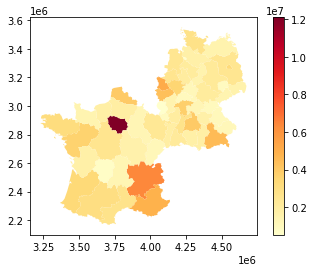

In [6]:
import geopandas as gpd

gpd_geo = gpd.GeoDataFrame(filt_ds.ds['geometry'].values, columns=['geometry'], index = filt_ds.ds.coords['nuts_2'])
gpd_geo['population'] = filt_ds.ds['population']
gpd_geo
gpd_geo.plot(column='population', legend=True,  cmap='YlOrRd')

### List power plants

In [7]:
filt_ds.ds['power_plants'].coords['tech']

<xarray.DataArray 'tech' (tech: 13)>
array(['Coal', 'Cogeneration', 'Geothermal', 'Hydro', 'Nuclear', 'Oil',
       'Solar', 'Waste', 'Wind', 'Wind Offshore', 'Biomass', 'Gas', 'Other'],
      dtype=object)
Coordinates:
  * tech     (tech) object 'Coal' 'Cogeneration' 'Geothermal' ... 'Gas' 'Other'

## Create new Calliope Model

In [17]:
import calliope
filt_ds.create_regions('poli_regions')
filt_ds.create_calliope_model(op_mode='plan',sectors=['power','heat'],co2_cap_factor=0.05, national=True)
model = calliope.Model('calliope_model/model.yaml',scenario='time_3H',override_dict={'run.solver': 'gurobi','run.solver_options.DualReductions': 0} )

/home/dozeumflc/anaconda3/envs/euses-tutorial/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6

 * All technologies were requested for inclusion in group constraint `systemwide_co2_cap`, but those from tech group(s) `[]` have been ignored as one or more of the constraints cannot be applied to technologies in these groups
/home/dozeumflc/anaconda3/envs/euses-tutorial/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning:

Mean of empty slice



In [15]:
model.run()

#model.plot.timeseries(subset={'costs': ['monetary']},array='power')#(array='carrier_con')

    we will be changing that default to 'Reals' in the future.  If you really
    intend the domain of this Param (lifetime) to be 'Any', you can suppress
    this warning by explicitly specifying 'within=Any' to the Param
    constructor.  (deprecated in 5.6.9, will be removed in 6.0)
    we will be changing that default to 'Reals' in the future.  If you really
    intend the domain of this Param (resource_unit) to be 'Any', you can
    suppress this warning by explicitly specifying 'within=Any' to the Param
    constructor.  (deprecated in 5.6.9, will be removed in 6.0)
    we will be changing that default to 'Reals' in the future.  If you really
    intend the domain of this Param (resource_unit) to be 'Any', you can
    suppress this warning by explicitly specifying 'within=Any' to the Param
    constructor.  (deprecated in 5.6.9, will be removed in 6.0)
    we will be changing that default to 'Reals' in the future.  If you really
    intend the domain of this Param (resource_unit)

ERROR: Rule failed when generating expression for constraint
    group_carrier_prod_max_constraint with index ('systemwide_biogas_cap',
    'power', 'max'): AttributeError: 'ConcreteModel' object has no attribute
    'group_constraint_loc_techs_systemwide_biogas_cap'
ERROR: Constructing component 'group_carrier_prod_max_constraint' from
    data=None failed: AttributeError: 'ConcreteModel' object has no attribute
    'group_constraint_loc_techs_systemwide_biogas_cap'


AttributeError: 'ConcreteModel' object has no attribute 'group_constraint_loc_techs_systemwide_biogas_cap'

In [ ]:
model.results

In [ ]:
model.plot.timeseries(array='resource_con')
